# This Notebook is used for exploring the dataset.

In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc

/Users/sophusbg/.env/fys-stk/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# First we need to load the data from the Kaggle repository

In [2]:
# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")
print("Path to dataset files:", path)

Path to dataset files: /Users/sophusbg/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [3]:
# List files in the dataset directory
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['Volcanoes_train', 'Volcanoes_test']


In [4]:
# Assign paths to train and test directories
train_dir = os.path.join(path, 'volcanoes_train')
test_dir = os.path.join(path, 'volcanoes_test')

In [5]:
train_files = os.listdir(train_dir)
print("Sample files in training directory:", train_files)

test_files = os.listdir(test_dir)
print("Sample files in test directory:", test_files[:5])

Sample files in training directory: ['train_images.csv', 'train_labels.csv']
Sample files in test directory: ['test_images.csv', 'test_labels.csv']


In [6]:
# Load sample data from training images and labels
train_images_path = os.path.join(train_dir, 'train_images.csv')
train_labels_path = os.path.join(train_dir, 'train_labels.csv')

train_images = pd.read_csv(train_images_path, header=None)
train_labels = pd.read_csv(train_labels_path)

# Display basic information
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

Training images shape: (7000, 12100)
Training labels shape: (7000, 4)


## Then we can start to explore the different labels in the data

In [7]:
# How many images DO NOT and DO contain volcanoes
train_labels['Volcano?'].value_counts()

Volcano?
0    6000
1    1000
Name: count, dtype: int64

In [8]:
# Cases where there are volcanoes
train_labels[train_labels['Volcano?']==1]

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
9,1,1.0,22.02,1.0
15,1,1.0,14.76,1.0
29,1,4.0,6.40,1.0
34,1,3.0,21.63,2.0
...,...,...,...,...
6940,1,2.0,25.50,1.0
6947,1,2.0,21.10,1.0
6949,1,4.0,4.00,1.0
6975,1,3.0,27.02,1.0


array([[<Axes: title={'center': 'Volcano?'}>,
        <Axes: title={'center': 'Type'}>],
       [<Axes: title={'center': 'Radius'}>,
        <Axes: title={'center': 'Number Volcanoes'}>]], dtype=object)

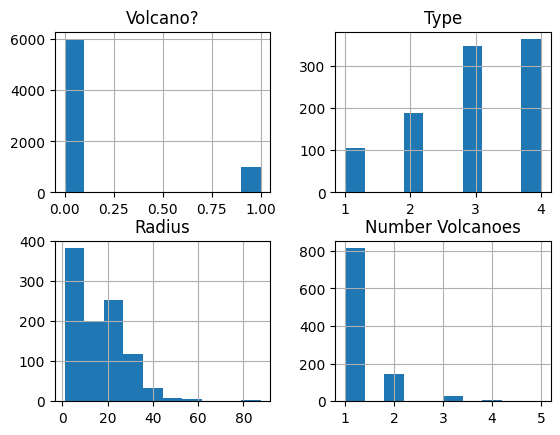

In [9]:
train_labels.hist()

## Lets plot some volcanoes to see how they look

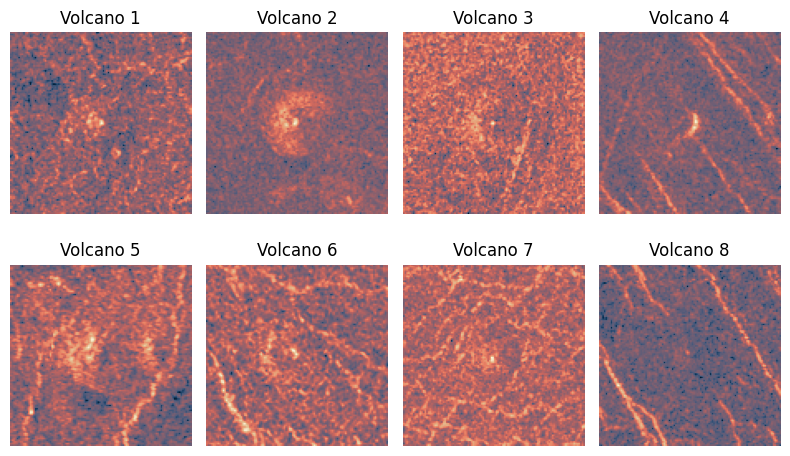

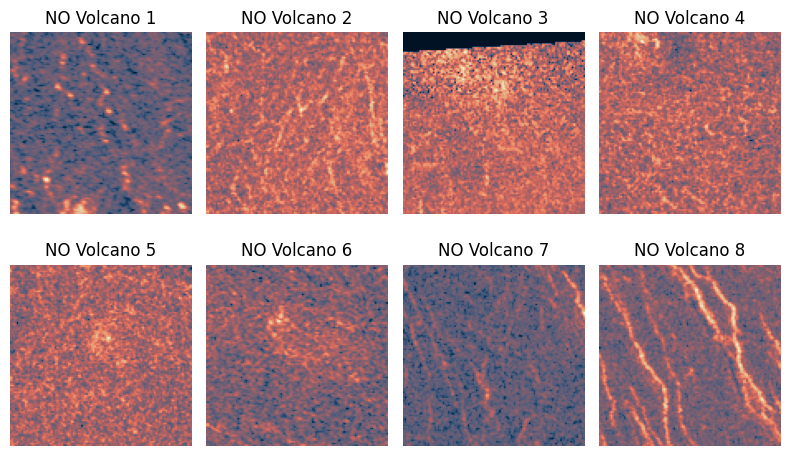

In [10]:
volcano_index = train_labels[train_labels['Volcano?'] == 1].head(8).index
plt.figure(figsize=(8, 5))
for i, idx in enumerate(volcano_index):
    plt.subplot(2, 4, i+1)
    plt.imshow(train_images.iloc[idx].values.reshape(110, 110), cmap=cmc.lipari)
    plt.title(f"Volcano {i+1}")
    plt.axis('off') 
plt.tight_layout()
plt.show()

no_volcano_index = train_labels[train_labels['Volcano?'] == 0].head(8).index
plt.figure(figsize=(8, 5))
for i, idx in enumerate(no_volcano_index):
    plt.subplot(2, 4, i+1)
    plt.imshow(train_images.iloc[idx].values.reshape(110, 110), cmap=cmc.lipari)
    plt.title(f"NO Volcano {i+1}")
    plt.axis('off') 
plt.tight_layout()
plt.show()

In [11]:
# Test data
test_images_path = os.path.join(test_dir, 'test_images.csv')
test_labels_path = os.path.join(test_dir, 'test_labels.csv')

test_images = pd.read_csv(test_images_path, header=None)
test_labels = pd.read_csv(test_labels_path)

test_images_scaled = test_images.values / 255

test_labels['Volcano?'].value_counts()

Volcano?
0    2300
1     434
Name: count, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophusbg/Documents/master/høst2024/FYS-STK4155/github/FYS-STK4155/project3/figures/theory_methods/volcano_0_lipari.png'

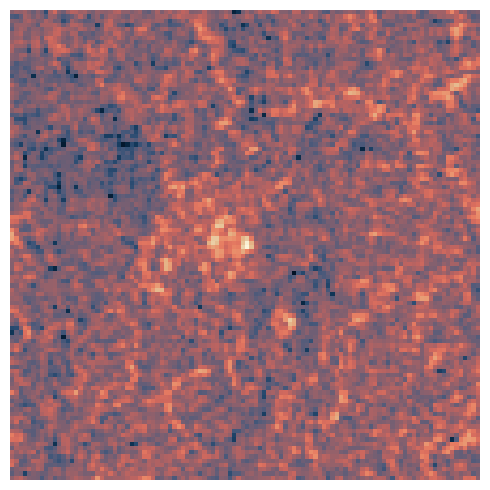

In [12]:
# cmap = "cividis"
cmap = 'lipari'
volcano_index = train_labels[train_labels['Volcano?'] == 1].head(2).index
for i, idx in enumerate(volcano_index):
    plt.figure(figsize=(5,5))
    plt.imshow(train_images.iloc[idx].values.reshape(110, 110), cmap=cmc.lipari)
    plt.axis('off') 
    plt.tight_layout()
    plt.savefig(f"../figures/theory_methods/volcano_{i}_{cmap}")
    plt.show()

no_volcano_index = train_labels[train_labels['Volcano?'] == 0].head(2).index
for i, idx in enumerate(no_volcano_index):
    plt.figure(figsize=(5,5))
    plt.imshow(train_images.iloc[idx].values.reshape(110, 110), cmap=cmc.lipari)
    plt.axis('off') 
    plt.tight_layout()
    plt.savefig(f"../figures/theory_methods/no_volcano_{i}_{cmap}")
    plt.show()

### Plot some of the different volcano types

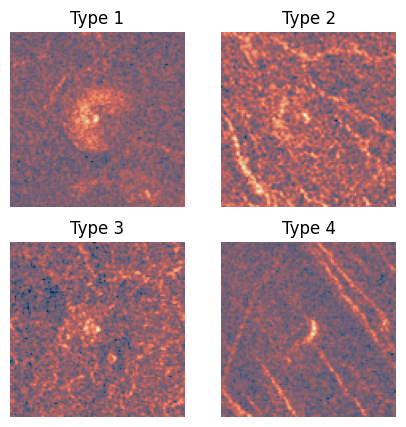

In [13]:
# Display images of volcanoes for each type
# one with type 1, one with type 2, one with type 3, and one with type 4
# Type 1: definitely a volcano
# Type 2: probably a volcano
# Type 3: possibly a volcano
# Type 4: only a pit is visible 
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image = train_images[train_labels['Type'] == i+1].iloc[0].values
    ax.imshow(image.reshape(110, 110), cmap=cmc.lipari)
    ax.set_title(f"Type {i+1}")
    ax.axis('off')
plt.show()

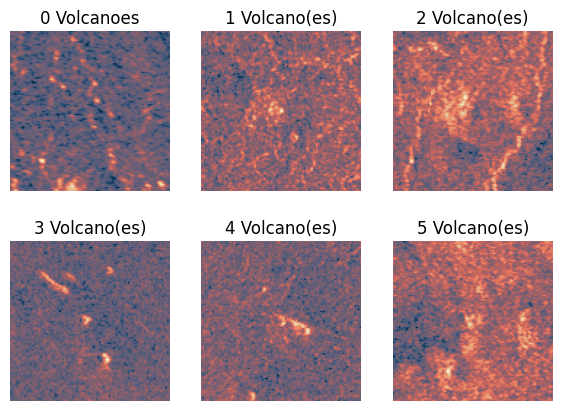

In [14]:
# Display images of volcanoes with different number of volcanoes
# one with 0 volcanoes, one with 1 volcano, one with 2 volcanoes, one with 3 volcanoes, one with 4 volcanoes, and one with 5 volcanoes
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i == 0:
        image = train_images[train_labels['Number Volcanoes'].isna()].iloc[0].values
        ax.set_title("0 Volcanoes")
    else:
        image = train_images[train_labels['Number Volcanoes'] == i].iloc[0].values
        ax.set_title(f"{i} Volcano(es)")
    ax.imshow(image.reshape(110, 110), cmap=cmc.lipari)
    ax.axis('off')
plt.show()

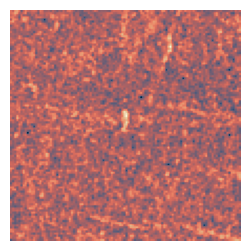

In [ ]:
# Display the smallest radius volcano, a middle radius volcano, the biggest radius volcano, and another radius
# first find the smallest radius 
sorted_radii = train_labels['Radius'].value_counts().sort_index()
min_radius = sorted_radii.index[0]
max_radius = sorted_radii.index[-1]
mid_radius1 = sorted_radii.index[len(sorted_radii) // 4]
mid_radius2 = sorted_radii.index[len(sorted_radii) // 2]
mid_radius3 = sorted_radii.index[3 * len(sorted_radii) // 4]

# Display the volcanos
plt.figure(figsize=(3, 3))
image = train_images[train_labels['Radius'] == min_radius].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
plt.savefig("../figures/volcano_1km.png", bbox_inches='tight')


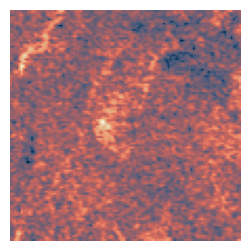

In [ ]:

plt.figure(figsize=(3, 3))
image = train_images[train_labels['Radius'] == mid_radius1].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
# plt.title(f'radius: {mid_radius1}')
plt.savefig("../figures/volcano_15_81km.png", bbox_inches='tight')

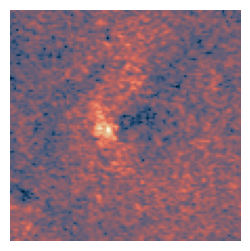

In [26]:
# Display the volcanos
plt.figure(figsize=(3, 3))
image = train_images[train_labels['Radius'] == mid_radius2].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
# plt.title(f'radius: {mid_radius2}')
plt.savefig("../figures/volcano_23_54km.png", bbox_inches='tight')

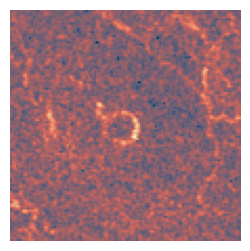

In [29]:
# Display the volcanos
plt.figure(figsize=(3, 3))
image = train_images[train_labels['Radius'] == mid_radius3].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
# plt.title(f'radius: {mid_radius3}')
plt.savefig("../figures/volcano_31_14km.png", bbox_inches='tight')

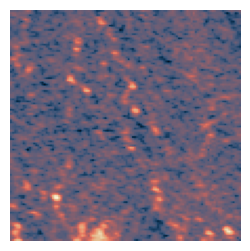

In [44]:
# Display the volcanos
plt.figure(figsize=(3, 3))
image = train_images[train_labels['Number Volcanoes'].isna()].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
plt.savefig("../figures/no_volcano.png", bbox_inches='tight')

Text(0.5, 1.0, 'radius: 87.66')

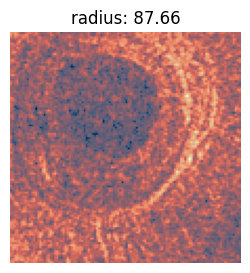

In [45]:
plt.figure(figsize=(3, 3))
image = train_images[train_labels['Radius'] == max_radius].iloc[0].values
plt.imshow(image.reshape(110, 110), cmap=cmc.lipari)
plt.axis('off')
# plt.title(f'radius: {max_radius}')
plt.savefig("../figures/volcano_87.66km.png", bbox_inches='tight')